# RQ2: What are emergent themes about climate change in major newspaper headlines on January 6th and 20th? 

## 1. Environment Creation

### 1.1 Library Import

In [1]:
''' DATA '''
import pandas as pd
import numpy as np

''' TOPIC MODELING '''
import pickle
from bertopic import BERTopic

''' NATURAL LANGUAGE PROCESSING '''
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
import regex as re

''' DATA VISUALIZATION '''
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.2 Data Import

#### 1.2.1 News Headlines

In [2]:
## News Headlines 
headlines_sixth = pd.read_excel("Climate Headlines - January 6th.xlsx")
headlines_twenty = pd.read_csv("Climate Headlines - January 20th.csv")

## Removing the unnamed column
headlines_sixth.drop(columns='Unnamed: 0',inplace=True)
headlines_twenty.drop(columns='Unnamed: 0',inplace=True)

In [3]:
sixth = []
for i in range(0,len(headlines_sixth)):
    sixth.append("January 6th: Capital Riots")
    
headlines_sixth['Focusing Event'] = sixth

In [4]:
twenty = []
for i in range(0,len(headlines_twenty)):
    twenty.append("January 20th: Presidential Inauguration")
    
headlines_twenty['Focusing Event'] = twenty

In [5]:
headlines = pd.concat([headlines_sixth,headlines_twenty])

headlines.head()

,source,tag,headlines,headline clean,Focusing Event
0,https://www.nytimes.com/section/climate,a,"<a class=""css-1326lay e5h2ety0"" href=""https://...","<i class=""css-1qtg4z6""></i><span aria-hidden=""...",January 6th: Capital Riots
1,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",Human composting is rising in popularity as an...,January 6th: Capital Riots
2,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",This greenhouse keeps crops cool. It could pro...,January 6th: Capital Riots
3,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",Biden just unveiled America’s ambitious new cl...,January 6th: Capital Riots
4,https://www.cnn.com/climate,span,"<span class=""container__headline-text"" data-ed...",The ‘world’s largest’ vacuum to suck climate p...,January 6th: Capital Riots


In [24]:
news_headlines = headlines['headline clean'].to_list()

##### 1.2.1.1 Some Light Data Cleaning

In [6]:
def number_remover(text):
    new_text = re.sub("\d","",text)
    clean_text = re.sub("[.,?!#$%<>\-_]","",new_text)
    return (clean_text)



In [7]:
headlines['clean text'] = headlines['headline clean'].apply(lambda x: number_remover(x))

#### 1.2.2 BERTopic Model
Here, I am reading in the pickle file from the political focusing events to pass into the news files 

In [8]:
topic_model = topic_model = BERTopic.load("nataliecastro/bsky")


In [9]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8,-1_godislove_digitalphotography_woofy_hjgikhjd...,"[godislove, digitalphotography, woofy, hjgikhj...",NaN
1,0,1125,0_resilience_strength_and_your,"[resilience, strength, and, your, our, we, com...",NaN
2,1,939,1_energy_renewable_fossil_renewables,"[energy, renewable, fossil, renewables, fuel, ...",NaN
3,2,720,2_paris_agreement_trump_withdraw,"[paris, agreement, trump, withdraw, us, from, ...",NaN
4,3,422,3_tibet_earthquake_nepal_least,"[tibet, earthquake, nepal, least, struck, magn...",NaN
...,...,...,...,...,...
214,213,27,213_florida_greencarmag_tampa_climatechange,"[florida, greencarmag, tampa, climatechange, i...",NaN
215,214,24,214_green_exploitative_surprises_fund,"[green, exploitative, surprises, fund, going, ...",NaN
216,215,18,215_fascism_worry_dissonance_path,"[fascism, worry, dissonance, path, cognitive, ...",NaN
217,216,60,216_scorched_earth_surprise_knows,"[scorched, earth, surprise, knows, no, tactics...",NaN


## 2. Classifiying News Headlines Using Public Discourse

In [31]:
''' CLASSIFYING THE TOPICS '''
news = headlines['clean text'].to_list()

probable_news_topics = []
for headline in news:
    current_topic, similarity = topic_model.find_topics(headline,top_n=1)
    probable_news_topics.append(current_topic[0])

In [32]:
focusing_events = headlines['Focusing Event'].to_list()

In [33]:
''' CREATING THE DATAFRAME '''
news_topics = pd.DataFrame()
news_topics['Headline'] = news
news_topics['Topic'] = probable_news_topics
news_topics['Focusing Event'] = focusing_events

In [34]:
''' FINDING THE TOPIC NAMES'''
topic_info = topic_model.get_topic_info()
topic_names = topic_info[['Topic','Name']]

In [35]:
''' MERGING TOPIC NAMES TO NEWS HEADLINES '''
news_topics = news_topics.merge(right=topic_names,on='Topic')

In [36]:
news_topics

,Headline,Topic,Focusing Event,Name
0,"i class=""cssqtgz""/ispan ariahidden=""true""@nytc...",162,January 6th: Capital Riots,162_satellites_httpswwwdlrdecontentenarticlesn...
1,"figure class=""srnoiv sahd lazyloadcontainer"" s...",162,January 6th: Capital Riots,162_satellites_httpswwwdlrdecontentenarticlesn...
2,"div class=""LineupContentCarouselBasicgridRight...",162,January 6th: Capital Riots,162_satellites_httpswwwdlrdecontentenarticlesn...
3,"div class=""LineupContentCarouselBasicgridRight...",162,January 6th: Capital Riots,162_satellites_httpswwwdlrdecontentenarticlesn...
4,"div class=""LineupContentCarouselBasicgridRight...",162,January 6th: Capital Riots,162_satellites_httpswwwdlrdecontentenarticlesn...
...,...,...,...,...
282,Day One: Trump signs executive orders on clima...,161,January 20th: Presidential Inauguration,161_executive_orders_immigration_order
283,Trump pardons nearly people over Capitol riot...,37,January 20th: Presidential Inauguration,37_pardons_rioters_orders_exits
284,Trump pardons January rioters and ditches cli...,37,January 20th: Presidential Inauguration,37_pardons_rioters_orders_exits
285,Trump begins first full day in office with dep...,4,January 20th: Presidential Inauguration,4_he_trump_his_climate


In [37]:
''' COUNTING HEADLINES PER TOPIC AND FOCUSING EVENT'''

## Grouping by focusing event
event_groups = news_topics.groupby('Focusing Event')

jan6 = event_groups.get_group("January 6th: Capital Riots")
jan20 = event_groups.get_group("January 20th: Presidential Inauguration")

jan6_values = jan6['Name'].value_counts()
jan20_values = jan20['Name'].value_counts()

In [38]:
jan6_value_df = pd.DataFrame(jan6_values)
jan20_value_df = pd.DataFrame(jan20_values)

In [39]:
sixth = []
for i in range(0,len(jan6_value_df)):
    sixth.append("January 6th: Capital Riots")

jan6_value_df['Focusing Event'] = sixth


twenty = []
for i in range(0,len(jan20_value_df)):
    twenty.append("January 20th: Presidential Inauguration")

jan20_value_df['Focusing Event'] = twenty

In [40]:
value_counts = pd.concat([jan6_value_df,jan20_value_df])

In [41]:
## Fixing the indices
value_counts.reset_index(inplace=True)

In [42]:
value_counts.rename(columns={"index":"Name",'Name':"Frequency"},inplace=True)

In [43]:
value_counts['Percentage'] = value_counts['Frequency'] / 287 ## value here is generated based on the 

In [44]:
value_counts

,Name,Frequency,Focusing Event,Percentage
0,168_httpsearthquaketenkijpbousaiearthquakedeta...,30,January 6th: Capital Riots,0.104530
1,157_earthquake_nhk_just_in,25,January 6th: Capital Riots,0.087108
2,3_tibet_earthquake_nepal_least,18,January 6th: Capital Riots,0.062718
3,162_satellites_httpswwwdlrdecontentenarticlesn...,6,January 6th: Capital Riots,0.020906
4,35_emissions_footprint_carbon_reduce,6,January 6th: Capital Riots,0.020906
...,...,...,...,...
57,47_air_pollution_wood_quality,1,January 20th: Presidential Inauguration,0.003484
58,58_taiwan_earthquake_magnitude_southern,1,January 20th: Presidential Inauguration,0.003484
59,161_executive_orders_immigration_order,1,January 20th: Presidential Inauguration,0.003484
60,4_he_trump_his_climate,1,January 20th: Presidential Inauguration,0.003484


In [106]:
''' CLEANING UP THE NAMES'''
value_counts['Name'].to_list()

['168_httpsearthquaketenkijpbousaiearthquakedetailhtmlxlargeimage_km_earthquake_aiten',
 '157_earthquake_nhk_just_in',
 '3_tibet_earthquake_nepal_least',
 '162_satellites_httpswwwdlrdecontentenarticlesnewsworldclimatereportclimatechangehtml_httpswwwdlrdecontentenarticlesnewseurecafieldcampaigncloudsasaclimatefactorhtml_httpswwwdlrdeenlatestnewsjuicespaceprobefliesbythemoonandearth',
 '35_emissions_footprint_carbon_reduce',
 '106_drought_water_rain_summer',
 '33_biodiversity_conservation_noplanetb_biodiversitycrisis',
 '129_policy_policies_disasters_setbacks',
 '60_deforestation_forest_amazon_forests',
 '1_energy_renewable_fossil_renewables',
 '73_biden_bidens_joe_jobs',
 '71_food_agriculture_vegan_animal',
 '49_greenhouse_greenhouses_seeds_gardening',
 '5_carbon_co_emissions_methane',
 '0_resilience_strength_and_your',
 '80_action_climatereality_joining_climate',
 '30_sustainability_sustainable_marketing_goals',
 '104_tesla_teslas_bought_elon',
 '122_glaciers_glacier_ice_preservation',

In [108]:
clean_topic_names = ['168_httpsearthquake_km_earthquake_aiten',
                     '157_earthquake_nhk_just_in',
                     '3_tibet_earthquake_nepal_least',
                     '162_satellites_httpsclimatereport_httpsclimatefactor_httpsspaceprobe',
 '35_emissions_footprint_carbon_reduce',
 '106_drought_water_rain_summer',
 '33_biodiversity_conservation_noplanetb_biodiversitycrisis',
 '129_policy_policies_disasters_setbacks',
 '60_deforestation_forest_amazon_forests',
 '1_energy_renewable_fossil_renewables',
 '73_biden_bidens_joe_jobs',
 '71_food_agriculture_vegan_animal',
 '49_greenhouse_greenhouses_seeds_gardening',
 '5_carbon_co_emissions_methane',
 '0_resilience_strength_and_your',
 '80_action_climatereality_joining_climate',
 '30_sustainability_sustainable_marketing_goals',
 '104_tesla_teslas_bought_elon',
 '122_glaciers_glacier_ice_preservation',
 '46_water_floods_extreme_cycle',
 '2_paris_agreement_trump_withdraw',
 '47_air_pollution_wood_quality',
 '126_lead_iq_roman_empire',
 '13_fossils_lover_century_ancient',
 '74_httpsearthquake_km_tunnel_iss',
 '114_school_schools_education_sustainability',
 '69_greenland_rare_minerals_melting',
 '194_protest_activists_repression_intensifying',
 '9_snow_cold_winter_weather',
 '-1_godislove_digitalphotography_woofy_hjgikhjdgjksdgikaujsj',
 '203_earthworms_soil_hostas_diatomaceous',
 '95_plastic_plastics_pollution_plasticpollution',
 '26_wildfires_fires_fire_wildfire',
 '168_httpsearthquake_km_earthquake_aiten',
 '2_paris_agreement_trump_withdraw',
 '5_carbon_co_emissions_methane',
 '1_energy_renewable_fossil_renewables',
 '26_wildfires_fires_fire_wildfire',
 '162_satellites_httpsclimatereport_httpsclimatefactor_httpsspaceprobe',
 '57_drill_baby_trump_vows',
 '67_global_warming_is_we',
 '35_emissions_footprint_carbon_reduce',
 '129_policy_policies_disasters_setbacks',
 '30_sustainability_sustainable_marketing_goals',
 '122_glaciers_glacier_ice_preservation',
 '60_deforestation_forest_amazon_forests',
 '106_drought_water_rain_summer',
 '80_action_climatereality_joining_climate',
 '71_food_agriculture_vegan_animal',
 '46_water_floods_extreme_cycle',
 '33_biodiversity_conservation_noplanetb_biodiversitycrisis',
 '37_pardons_rioters_orders_exits',
 '73_biden_bidens_joe_jobs',
 '0_resilience_strength_and_your',
 '31_drought_team_championship_football',
 '68_trees_forests_forest_apples',
 '153_gaza_genocide_israel_cancer',
 '47_air_pollution_wood_quality',
 '58_taiwan_earthquake_magnitude_southern',
 '161_executive_orders_immigration_order',
 '4_he_trump_his_climate',
 '8_earthquake_earthquakes_ss_felt'
    
]

In [ ]:
threshold = 1  # Adjust this value as needed

# Filter data where the count for a bar is greater than or equal to the threshold
filtered_data = news_topics.groupby(['Name', 'Focusing Event']).size().reset_index(name='Count')

# Drop rows with missing or non-finite values
filtered_data = filtered_data.dropna(subset=['Name', 'Count'])
filtered_data = filtered_data[filtered_data['Count'].apply(lambda x: np.isfinite(x))]

# Apply threshold and sort
filtered_data = filtered_data[filtered_data['Count'] > threshold]
filtered_data['Name'] = pd.Categorical(
    filtered_data['Name'], 
    categories=filtered_data.groupby('Name')['Count'].sum().sort_values(ascending=False).index, 
    ordered=True
)


In [144]:
filtered_data['Name'].to_list()

['0_resilience_strength_and_your',
 '104_tesla_teslas_bought_elon',
 '106_drought_water_rain_summer',
 '106_drought_water_rain_summer',
 '122_glaciers_glacier_ice_preservation',
 '122_glaciers_glacier_ice_preservation',
 '129_policy_policies_disasters_setbacks',
 '129_policy_policies_disasters_setbacks',
 '157_earthquake_nhk_just_in',
 '162_satellites_httpswwwdlrdecontentenarticlesnewsworldclimatereportclimatechangehtml_httpswwwdlrdecontentenarticlesnewseurecafieldcampaigncloudsasaclimatefactorhtml_httpswwwdlrdeenlatestnewsjuicespaceprobefliesbythemoonandearth',
 '162_satellites_httpswwwdlrdecontentenarticlesnewsworldclimatereportclimatechangehtml_httpswwwdlrdecontentenarticlesnewseurecafieldcampaigncloudsasaclimatefactorhtml_httpswwwdlrdeenlatestnewsjuicespaceprobefliesbythemoonandearth',
 '168_httpsearthquaketenkijpbousaiearthquakedetailhtmlxlargeimage_km_earthquake_aiten',
 '168_httpsearthquaketenkijpbousaiearthquakedetailhtmlxlargeimage_km_earthquake_aiten',
 '1_energy_renewable_fo

In [148]:
filtered_clean = ['0_resilience_strength_and_your',
 '104_tesla_teslas_bought_elon',
 '106_drought_water_rain_summer',
 '106_drought_water_rain_summer',
 '122_glaciers_glacier_ice_preservation',
 '122_glaciers_glacier_ice_preservation',
 '129_policy_policies_disasters_setbacks',
 '129_policy_policies_disasters_setbacks',
 '157_earthquake_nhk_just_in',
 '162_satellites_climatereport_climatefactor_spaceprobe',
 '162_satellites_climatereport_climatefactor_spaceprobe',
 '168_earthquake_km_earthquake_aiten',
 '168_earthquake_km_earthquake_aiten',
 '1_energy_renewable_fossil_renewables',
 '1_energy_renewable_fossil_renewables',
 '26_wildfires_fires_fire_wildfire',
 '2_paris_agreement_trump_withdraw',
 '2_paris_agreement_trump_withdraw',
 '30_sustainability_sustainable_marketing_goals',
 '30_sustainability_sustainable_marketing_goals',
 '33_biodiversity_conservation_noplanetb_biodiversitycrisis',
 '33_biodiversity_conservation_noplanetb_biodiversitycrisis',
 '35_emissions_footprint_carbon_reduce',
 '35_emissions_footprint_carbon_reduce',
 '37_pardons_rioters_orders_exits',
 '3_tibet_earthquake_nepal_least',
 '46_water_floods_extreme_cycle',
 '46_water_floods_extreme_cycle',
 '47_air_pollution_wood_quality',
 '49_greenhouse_greenhouses_seeds_gardening',
 '57_drill_baby_trump_vows',
 '5_carbon_co_emissions_methane',
 '5_carbon_co_emissions_methane',
 '60_deforestation_forest_amazon_forests',
 '60_deforestation_forest_amazon_forests',
 '67_global_warming_is_we',
 '71_food_agriculture_vegan_animal',
 '71_food_agriculture_vegan_animal',
 '73_biden_bidens_joe_jobs',
 '80_action_climatereality_joining_climate',
 '80_action_climatereality_joining_climate']

In [149]:
filtered_data['Name'] = filtered_clean

In [153]:
filtered_data.sort_values(by='Count',ascending=False,inplace=True)

In [164]:
filtered_data

,Name,Focusing Event,Count
19,168_earthquake_km_earthquake_aiten,January 6th: Capital Riots,30
18,168_earthquake_km_earthquake_aiten,January 20th: Presidential Inauguration,28
26,2_paris_agreement_trump_withdraw,January 20th: Presidential Inauguration,25
14,157_earthquake_nhk_just_in,January 6th: Capital Riots,25
36,3_tibet_earthquake_nepal_least,January 6th: Capital Riots,18
21,1_energy_renewable_fossil_renewables,January 20th: Presidential Inauguration,7
24,26_wildfires_fires_fire_wildfire,January 20th: Presidential Inauguration,7
45,5_carbon_co_emissions_methane,January 20th: Presidential Inauguration,7
34,35_emissions_footprint_carbon_reduce,January 6th: Capital Riots,6
17,162_satellites_climatereport_climatefactor_spa...,January 6th: Capital Riots,6


## 3. Visualizing Topic Distribution by Focusing Event

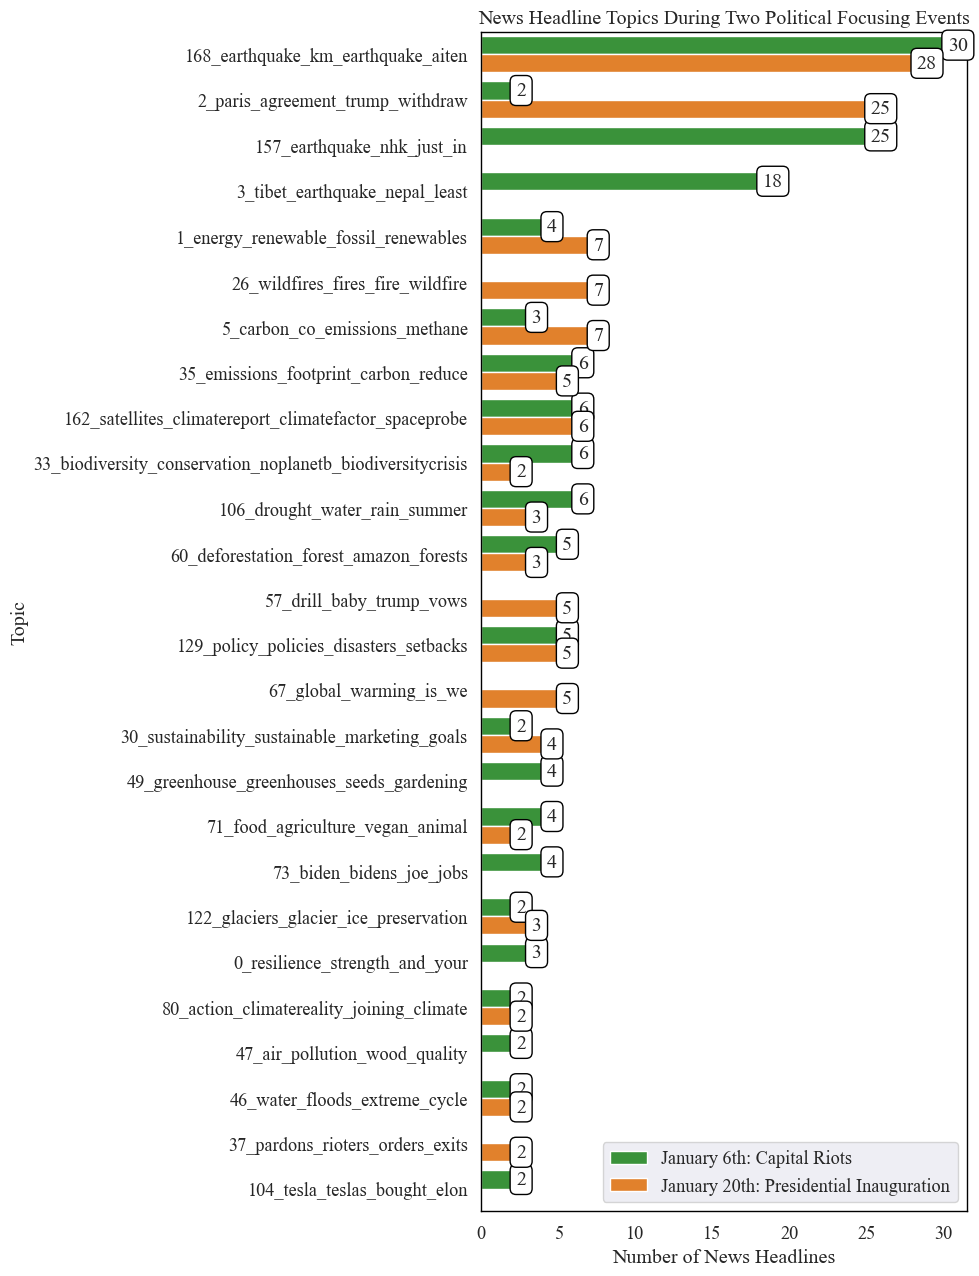

In [166]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

# Set style and font
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)

custom_palette = {
    "January 20th: Presidential Inauguration": "#ff7f0e",  # Orange
    "January 6th: Capital Riots": "#2ca02c",  # Green
}

# Set figure size
fig, ax = plt.subplots(figsize=(10, 13))  # Adjusted height for better y-axis spacing

# Plot horizontal bar plot
hist = sb.barplot(data=filtered_data, y="Name", x="Count", hue="Focusing Event",palette=custom_palette, ax=ax)

# Add bar labels directly to the bars
for container in hist.containers:
    hist.bar_label(
        container, 
        fmt='%d', 
        label_type='edge', 
        padding=3, 
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
    )

# Customize plot appearance
hist.set_title("News Headline Topics During Two Political Focusing Events")
hist.set_xlabel("Number of News Headlines")
hist.set_ylabel("Topic")
ax.tick_params(axis='y', labelrotation=0)  # Ensure y-axis labels are horizontal
ax.grid(True, axis='x', linestyle='--', alpha=0.7)
ax.set_facecolor("white")


# Apply the hatch patterns based on the hue
for i, container in enumerate(hist.containers):
    for bar in container:
        # Get the hue category for this bar (based on its label)
        hue_category = bar.get_label()
        
        # Check if the hue category has a corresponding hatch pattern
        if hue_category in hatch_patterns:
            bar.set_hatch(hatch_patterns[hue_category])  # Apply 

# Format x-axis ticks
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.xaxis.set_major_formatter(formatter)

# Customize plot borders
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
    
hist.legend(loc='lower right', bbox_to_anchor=(1, 0))


# Adjust layout and show plot
plt.tight_layout()
plt.savefig("News Headline Topics During Two Political Focusing Events.png",dpi=2500)
plt.show()


## 4. Creating the table for distributions by dictionary type

In [11]:
''' DICTIONARY DEFINITION '''
climate_change = ["global warming","climate change","greenhouse gas","greenhouse gases"]
science = ["scientist","scientists","research","researchers","researching","researched",
           "professor","professors"]
policy_management = ["policy","legislation","FEMA","management","disaster respons",'government']

republican = ['republican','republicans','GOP','conservative','conservatives','MAGA']
democrat = ['democrat','democrats','liberal','liberals',"DNC"]

eaej = ['resilience','just transition','climate justice','environmental justice',
                  'climate activism','climate anxiety','environmental racism','ecoside']

focusing_event = ['insurrection','wildfires','inauguration']

word_counter = {"global warming":0,"climate change":0,"greenhouse gas":0,"greenhouse gases":0,
             "scientist":0,"scientists":0,"research":0,"researchers":0,"researching":0,"researched":0,
             "professor":0,"professors":0, "policy":0,"legislation":0,"FEMA":0,"management":0,"disaster respons":0,'government':0,
             'republican':0,'republicans':0,'GOP':0,'conservative':0,'conservatives':0,'MAGA':0,
             'democrat':0,'democrat':0,'liberal':0,'liberals':0,"DNC":0,
               'resilience':0,'just transition':0,'climate justice':0,'environmental justice':0,
                  'climate activism':0,'climate anxiety':0,'environmental racism':0,'ecoside':0,
               'insurrection':0,'wildfires':0,'inaguration':0}

climate_words = list(word_counter.keys())

In [12]:
semantic_topics_nested = []
for word in climate_words:
    related_tuple = topic_model.find_topics(search_term=word)
    related_topics = related_tuple[0]
    
    semantic_topics_nested.append(related_topics)
    
semantic_topics = sum(semantic_topics_nested, [])

In [53]:
semantic_topics = list(set(semantic_topics))

In [14]:
semantic_topics_nested

[[67, 70, 5, 122, 1],
 [67, 11, 80, 106, 70],
 [5, 49, 35, 1, 117],
 [5, 49, 35, 117, 1],
 [195, 13, 16, 23, 126],
 [195, 23, 201, 13, 16],
 [195, 56, 94, 50, 134],
 [195, 56, 50, 39, 23],
 [195, 56, 134, 45, 187],
 [195, 56, 23, 13, 39],
 [114, 27, 199, 161, 16],
 [114, 195, 161, 189, 37],
 [129, 96, 81, 80, 185],
 [129, 82, 96, 113, 34],
 [26, 10, 16, 213, 189],
 [161, 185, 37, 30, 138],
 [0, 34, 129, 8, 157],
 [96, 81, 34, 129, 115],
 [115, 42, 81, 10, 182],
 [115, 42, 10, 81, 182],
 [115, 42, 10, 182, 82],
 [115, 42, 81, 27, 129],
 [115, 42, 81, 27, 166],
 [10, 138, 115, 200, 34],
 [42, 115, 81, 27, 182],
 [42, 115, 27, 81, 166],
 [42, 115, 27, 166, 10],
 [42, 115, 182, 27, 215],
 [0, 34, 30, 72, 215],
 [11, 70, 80, 67, 23],
 [5, 80, 49, 106, 129],
 [30, 204, 113, 33, 35],
 [194, 5, 81, 49, 80],
 [106, 46, 67, 5, 9],
 [30, 204, 33, 194, 29],
 [139, 86, 49, 187, 159],
 [89, 194, 146, 166, 96],
 [26, 46, 60, 140, 101],
 [80, 93, 199, 194, 89]]

In [15]:
climate_topics = topic_model.get_topics(semantic_topics,)

In [17]:
topic_model.get_topic_info(semantic_topics[9])

,Topic,Count,Name,Representation,Representative_Docs
0,70,132,70_warming_up_my_idea,"[warming, up, my, idea, bench, warm, bit, so, ...",NaN


In [18]:
climate_topic_info = []

for topic in semantic_topics:
    current_info = topic_model.get_topic_info(topic)
    climate_topic_info.append(current_info)
    
climate_topics = pd.concat(climate_topic_info)

In [19]:
semantic_topics_nested = []
for word in climate_words:
    related_tuple = topic_model.find_topics(search_term=word)
    related_topics = related_tuple[0]
    
    semantic_topics_nested.append(related_topics)
    
semantic_topics = sum(semantic_topics_nested, [])

In [20]:
labels = {}
for nest in range(0,len(semantic_topics_nested)):
    topic_nest = semantic_topics_nested[nest]
    related_word = climate_words[nest]
    
    labels[related_word] = topic_nest

In [21]:
labels

{'global warming': [67, 70, 5, 122, 1],
 'climate change': [67, 11, 80, 106, 70],
 'greenhouse gas': [5, 49, 35, 1, 117],
 'greenhouse gases': [5, 49, 35, 117, 1],
 'scientist': [195, 13, 16, 23, 126],
 'scientists': [195, 23, 201, 13, 16],
 'research': [195, 56, 94, 50, 134],
 'researchers': [195, 56, 50, 39, 23],
 'researching': [195, 56, 134, 45, 187],
 'researched': [195, 56, 23, 13, 39],
 'professor': [114, 27, 199, 161, 16],
 'professors': [114, 195, 161, 189, 37],
 'policy': [129, 96, 81, 80, 185],
 'legislation': [129, 82, 96, 113, 34],
 'FEMA': [26, 10, 16, 213, 189],
 'management': [161, 185, 37, 30, 138],
 'disaster respons': [0, 34, 129, 8, 157],
 'government': [96, 81, 34, 129, 115],
 'republican': [115, 42, 81, 10, 182],
 'republicans': [115, 42, 10, 81, 182],
 'GOP': [115, 42, 10, 182, 82],
 'conservative': [115, 42, 81, 27, 129],
 'conservatives': [115, 42, 81, 27, 166],
 'MAGA': [10, 138, 115, 200, 34],
 'democrat': [42, 115, 81, 27, 182],
 'liberal': [42, 115, 27, 81,

In [26]:
climate_change_topics = [67, 70, 5, 122, 1, 11, 80, 106,5, 49, 35, 117]
science_topics = [195, 13, 16, 23, 126,23,201, 56, 94, 50, 134,39,45,187,39,
                              114, 27, 199, 161,195,189,37]
policy_topics = [129, 96, 81, 80, 185,82,113,34,
                              26, 10, 16, 213, 189,
                              161, 37, 30, 138,
                              0, 34, 129, 8, 157,
                              115]
republican_topics = [115, 42, 81, 10, 182,
                              82,27,129,166,138,115,200,34]
democrat_topics = [42, 115, 81, 27, 182,
                              166,10,215]
eaej_topics = [0, 34, 30, 72, 215,11, 70, 67, 23,
                              5, 49, 106, 129,204,113,33,35,194,81,49,80]

focusing_event_topics =  [89, 194, 146, 166, 96,
                              26, 46, 60, 140, 101,
                              80, 93, 199,]

In [22]:
climate_topics = climate_topics.sort_values(by='Count',ascending=False)

In [23]:
climate_topics

,Topic,Count,Name,Representation,Representative_Docs
0,0,1125,0_resilience_strength_and_your,"[resilience, strength, and, your, our, we, com...",NaN
0,0,1125,0_resilience_strength_and_your,"[resilience, strength, and, your, our, we, com...",NaN
0,1,939,1_energy_renewable_fossil_renewables,"[energy, renewable, fossil, renewables, fuel, ...",NaN
0,1,939,1_energy_renewable_fossil_renewables,"[energy, renewable, fossil, renewables, fuel, ...",NaN
0,1,939,1_energy_renewable_fossil_renewables,"[energy, renewable, fossil, renewables, fuel, ...",NaN
...,...,...,...,...,...
0,215,18,215_fascism_worry_dissonance_path,"[fascism, worry, dissonance, path, cognitive, ...",NaN
0,215,18,215_fascism_worry_dissonance_path,"[fascism, worry, dissonance, path, cognitive, ...",NaN
0,200,18,200_mersea_actus_guardianeco_news,"[mersea, actus, guardianeco, news, pledge, cop...",NaN
0,199,16,199_denier_term_sensible_his,"[denier, term, sensible, his, trumps, elected,...",NaN


In [53]:
value_counts

,Name,Frequency,Focusing Event,Percentage,Topic
0,168_httpsearthquaketenkijpbousaiearthquakedeta...,30,January 6th: Capital Riots,0.104530,168
1,157_earthquake_nhk_just_in,25,January 6th: Capital Riots,0.087108,157
2,3_tibet_earthquake_nepal_least,18,January 6th: Capital Riots,0.062718,3
3,162_satellites_httpswwwdlrdecontentenarticlesn...,6,January 6th: Capital Riots,0.020906,162
4,35_emissions_footprint_carbon_reduce,6,January 6th: Capital Riots,0.020906,35
...,...,...,...,...,...
57,47_air_pollution_wood_quality,1,January 20th: Presidential Inauguration,0.003484,47
58,58_taiwan_earthquake_magnitude_southern,1,January 20th: Presidential Inauguration,0.003484,58
59,161_executive_orders_immigration_order,1,January 20th: Presidential Inauguration,0.003484,161
60,4_he_trump_his_climate,1,January 20th: Presidential Inauguration,0.003484,4


In [51]:
def topic_num(topic_name):
    pattern = r"[0-9]{1,3}"
    
    found = re.findall(pattern,topic_name)
    string_found = found[0]
    int_found = int(string_found)
    return (int_found)

In [52]:
value_counts['Topic'] = value_counts['Name'].apply(lambda x: topic_num(x))

In [57]:
def dictionary_filter(topic_dictionary):
    frequencies = []
    for topic in topic_dictionary:
        topic_condition = value_counts['Topic'] == topic
        
        current_frequency = value_counts[topic_condition]
        if len(current_frequency) != 0:
            frequency = current_frequency.iloc[0,1]

            current_frequency = {"topic":topic,"frequency":frequency}
        else:
            current_frequency = {"topic":topic,"frequency":0}
        
        frequencies.append(current_frequency)
        
    return (pd.DataFrame(frequencies))

In [64]:
climate_change_freqs = dictionary_filter(climate_change_topics)
science_freqs = dictionary_filter(science_topics)
policy_freqs = dictionary_filter(policy_topics)
republican_freqs = dictionary_filter(republican_topics)
democrat_freqs = dictionary_filter(democrat_topics)
eaej_freqs = dictionary_filter(eaej_topics)
focusing_event_freqs = dictionary_filter(focusing_event_topics)

frequencies = [climate_change_freqs,science_freqs,policy_freqs,republican_freqs,
              democrat_freqs,eaej_freqs,focusing_event_freqs]

dictionary_names = ["Climate Change","Science",'Policy','Republican','Democrat','Environmental Action\n& Environmental Justice','Focusing Moments']

In [65]:
dictionary_values = []
for i in range(0,len(dictionary_names)):
    current_dictionary = dictionary_names[i]
    
    current_freq = frequencies[i]
    desc = current_freq.describe()
    mean = desc.iloc[1,1]
    min_ = desc.iloc[3,1]
    max_ = desc.iloc[7,1]
    freq = current_freq['frequency'].sum()
    
    dictionary_topic_info = {"Dictionary":current_dictionary,"Total Frequency":freq,
                            "Average Topic Size":mean,"Maximum Topic Size":max_,"Minimum Topic Size":min_}
    
    dictionary_values.append(dictionary_topic_info)
    
    print (current_dictionary,"-----------------")
    print (f"Total Frequency: {freq}\nMean: {mean}\nMin: {min_}\nMax: {max_}\n")

Climate Change -----------------
Total Frequency: 35
Mean: 2.9166666666666665
Min: 0.0
Max: 6.0

Science -----------------
Total Frequency: 6
Mean: 0.2727272727272727
Min: 0.0
Max: 2.0

Policy -----------------
Total Frequency: 47
Mean: 2.0434782608695654
Min: 0.0
Max: 25.0

Republican -----------------
Total Frequency: 5
Mean: 0.38461538461538464
Min: 0.0
Max: 5.0

Democrat -----------------
Total Frequency: 0
Mean: 0.0
Min: 0.0
Max: 0.0

Environmental Action
& Environmental Justice -----------------
Total Frequency: 47
Mean: 2.238095238095238
Min: 0.0
Max: 6.0

Focusing Moments -----------------
Total Frequency: 11
Mean: 0.8461538461538461
Min: 0.0
Max: 5.0



In [66]:
values = pd.DataFrame(dictionary_values).sort_values(by='Total Frequency',ascending=False)
values 

,Dictionary,Total Frequency,Average Topic Size,Maximum Topic Size,Minimum Topic Size
2,Policy,47,2.043478,25.0,0.0
5,Environmental Action\n& Environmental Justice,47,2.238095,6.0,0.0
0,Climate Change,35,2.916667,6.0,0.0
6,Focusing Moments,11,0.846154,5.0,0.0
1,Science,6,0.272727,2.0,0.0
3,Republican,5,0.384615,5.0,0.0
4,Democrat,0,0.000000,0.0,0.0


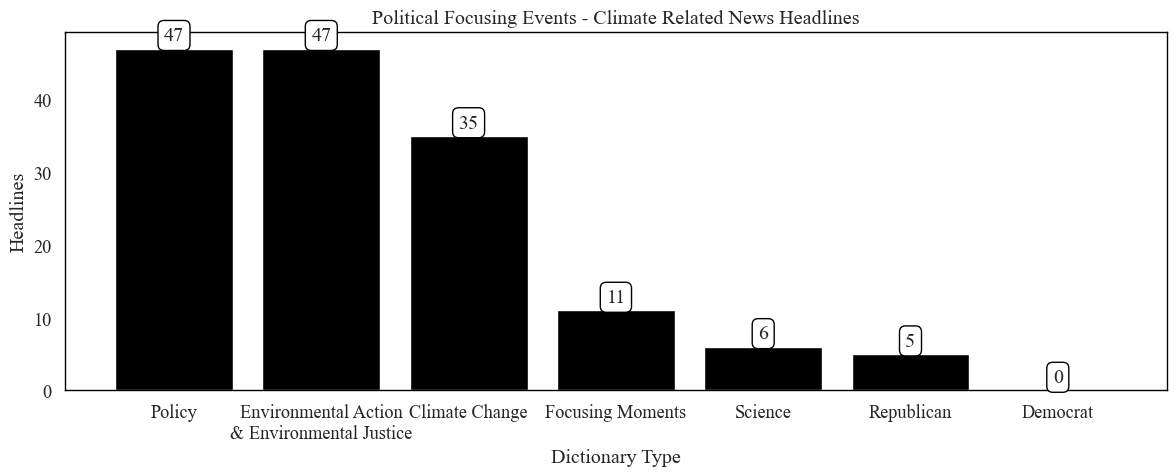

In [68]:
sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,5 )) 



hist = sb.barplot(values,x="Dictionary",y="Total Frequency",color="black")


for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

hist.set_title("Political Focusing Events - Climate Related News Headlines")
hist.set_xlabel("Dictionary Type")
hist.set_ylabel("Headlines")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)


# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.savefig("Political Focusing Events - Climate Related News Headlines.png",dpi=2500)
plt.show();